In [211]:
from pathlib import Path
import google.generativeai as genai
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from dotenv import load_dotenv
load_dotenv()

In [212]:
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

# Set up the model
generation_config = {
  "temperature": 0.4,
  "top_p": 1,
  "top_k": 32,
  "max_output_tokens": 4096,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
]

model = genai.GenerativeModel(model_name="gemini-pro-vision",
                              generation_config=generation_config,
                              safety_settings=safety_settings)



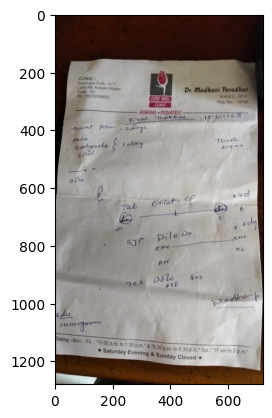

In [213]:
image = cv2.imread('../test2.jpeg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image, cmap='gray')
plt.show()

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1674: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'cv::adaptiveThreshold'


In [214]:
# image_parts = [
#   {
#     "mime_type": "image/jpeg",
#     "data": Path("../test2.jpeg").read_bytes()
#   },
# ]


In [215]:
pil_image = Image.fromarray(image)

prompt_parts = [
  pil_image,
  '''
  You have 2 tasks:
  1. Extract the accurate date given in the image. MAKE SURE THE DATE IS ACCURATE, THE DATE IS THE MOST IMPORTANT PART OF THE TASK. 
  2. Write a short summary of the text given in the image. Make sure to specify the name of the patient and what diseases he is suffering from. Also specify other details given in the image like the medicines prescribed and other details of the patient and doctor.
  
  Give your output in a json STRICTLY in this format:
  {
    "date": "DD|MM|YYYY",
    "name": "Name of the patient",
    "diseases": "Diseases the patient is suffering from",
    "medicines": "Medicines prescribed to the patient, if any (if none, write 'None')",
    "doctor": "Name of the doctor, if given. If not given write 'None'",
    "summary": "The rest of the information given in the image",
    
  }
  ''',
]


In [216]:
response = model.generate_content(prompt_parts)
print(response.text)

 ```json
{
  "date": "15|10|2023",
  "name": "Virat Thakkar",
  "diseases": "Throat pain, bodyache, and cold",
  "medicines": "Tab Oncet CP, SYP Dilo Dr, Tab D60",
  "doctor": "Dr. Madhavi Paradkar",
  "summary": "The patient is suffering from throat pain, bodyache, and cold. He has been prescribed Tab Oncet CP, SYP Dilo Dr, and Tab D60. The medicines are to be taken as directed by the doctor."
}
```
